In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import sys
import os
print(f"Đã cài đặt thành công các thư viện")

Đã cài đặt thành công các thư viện


In [14]:
try:
    module_path=os.path.dirname(os.path.abspath(__file__))
except NameError as e:
    module_path=os.path.abspath('.')
    print(f"Biến __file__ không tồn tại, sử dụng CWD làm module_path: {module_path}")
print(f"Đường dẫn của module là: {module_path}")


if module_path not in sys.path:
    sys.path.append(module_path)
print(f"Đã thêm đường dẫn của module vào sys.path")

print(f"Đang chạy data_set.ipynb")
%run ./data_set.ipynb
try:
    if 'train_loader' not in locals():
        raise NameError('train_loader not found')
    if 'validation_loader' not in locals():
        raise NameError('validation_loader not found')
    if 'num_classes' not in locals():
        raise NameError('num_classes not found')
except Exception as e:
    print(f"Đã xảy ra lỗi khi chạy data_set.ipynb: {e}")
    raise
print(f"Đã chạy thành công data_set.ipynb")


print(f"Đang chạy model.ipynb")
%run ./model.ipynb
print(f"Đã chạy thành công model.ipynb")

print(f"Đang chạy loss.ipynb")
%run ./loss.ipynb
print(f"Đã chạy thành công loss.ipynb")

try:
    _ =SimpleCNN
    _ =get_loss_custom
except NameError as e:
    print(f"Đã xảy ra lỗi: {e}")
    print(f"Vui lòng kiẻm tra lại đường dẫn đến các file .ipynb")
print(f"Đã kiểm tra thành công các biến cần thiết")



Biến __file__ không tồn tại, sử dụng CWD làm module_path: /Users/namtran/practice.py/mini_project_cats_dogs/src
Đường dẫn của module là: /Users/namtran/practice.py/mini_project_cats_dogs/src
Đã thêm đường dẫn của module vào sys.path
Đang chạy data_set.ipynb
Đã import các thư viện
Thư mục train : /Users/namtran/practice.py/mini_project_cats_dogs/data/train
Thư mục validation : /Users/namtran/practice.py/mini_project_cats_dogs/data/validation
:Kích thước ảnh chuẩn hoá : 22500
Kích thước lô dữ liệu : 35
Đã định nghĩa các phép biến đổi cho tập train và validation
Tạo đối tượng thành công
Số lớp : 2
Tên lớp : ['cats', 'dogs']
Chỉ số lớp : {'cats': 0, 'dogs': 1}
Đã tạo thành công DataLoader cho tập train và validation
Kiểm tra dataloader
Kích thước ảnh kiểm tra : torch.Size([35, 3, 150, 150])
Kích thước nhãn kiểm tra : torch.Size([35])
Kiểm tra dataloader thành công
Đã kiểm tra dataloader thành công
Đã chạy thành công data_set.ipynb
Đang chạy model.ipynb
Đã import các thư viện cần thiết
Chạy

# Thiết lập tham số cấu hình

In [15]:
learning_rate=0.001
num_epochs=6
batch_size=18
img_size=150
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Train - Sử dụng DEVICE: MPS (Apple GPU)")
else:
    device = torch.device("cpu")
    print(f"Train - Sử dụng DEVICE: CPU (MPS không khả dụng hoặc không được build)")

print(f"Thiết bị đang sử dụng là: {device}")
print(f"Learning Rate là: {learning_rate}")
print(f"Số lượng epoch là:{num_epochs}")
print(f"Kích thước batch là: {batch_size}")
print(f"Kích thước ảnh là: {img_size}")
print(f"Đang khởi tạo mô hình")

Train - Sử dụng DEVICE: MPS (Apple GPU)
Thiết bị đang sử dụng là: mps
Learning Rate là: 0.001
Số lượng epoch là:6
Kích thước batch là: 18
Kích thước ảnh là: 150
Đang khởi tạo mô hình


# Chuẩn bị dữ liệu 

In [16]:
print(f"\n--Chuẩn bị dữ liệu--")
try:
    %run ./data_set.ipynb
    if 'train_loader' not in locals():
        raise NameError('train_loader not found')
    if 'validation_loader' not in locals():
        raise NameError('validation_loader not found')
    if 'num_classes' not in locals():
        raise NameError('num_classes not found')
except Exception as e:
    print(f"Đã xảy ra lỗi khi chạy data_set.ipynb: {e}")


 Chuẩn bị dữ liệu 
Đã import các thư viện
Thư mục train : /Users/namtran/practice.py/mini_project_cats_dogs/data/train
Thư mục validation : /Users/namtran/practice.py/mini_project_cats_dogs/data/validation
:Kích thước ảnh chuẩn hoá : 22500
Kích thước lô dữ liệu : 35
Đã định nghĩa các phép biến đổi cho tập train và validation
Tạo đối tượng thành công
Số lớp : 2
Tên lớp : ['cats', 'dogs']
Chỉ số lớp : {'cats': 0, 'dogs': 1}
Đã tạo thành công DataLoader cho tập train và validation
Kiểm tra dataloader
Kích thước ảnh kiểm tra : torch.Size([35, 3, 150, 150])
Kích thước nhãn kiểm tra : torch.Size([35])
Kiểm tra dataloader thành công
Đã kiểm tra dataloader thành công


# Khởi tạo model,loss và optimizer

In [17]:
print(f"\n--Tạo đối tượng model,loss và optimizer--")

if torch.backends.mps.is_available():
    device=torch.device('mps')
    print(f"Đang sử dụng  GPU(MPS) của Apple")
elif torch.backends.mps.is_built():
    print(f"MPS không khả dụng hãy kiểm tra lại cài đặt macos")
    devvice=torch.device('cpu')
    print(f"Đang sử dụng CPU")
else:
    device=torch.device('cpu')
    print(f"Đang sử dụng CPU")
try:
    #khởi tạo model
    num_model_classes=1
    model=SimpleCNN(num_classes=num_model_classes,
                    img_size=img_size)
    model.to(device)
    print(f"Đã khởi tạo model")

    #khởi tạo loss
    criterion=get_loss_custom()
    print(f"Đã chọn hàm loss tuỳ chỉnh")

    #khởi tạo optimizer
    optimizer=optim.Adam(model.parameters(),lr=learning_rate)
    print(f"Optimizer đã được khởi tạo")

except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")
    print(f"Lỗi: Một trong các lớp hoặc hàm chưa được định nghĩa hoặc import")

#hàm tính accuracy
def calculate_accuracy(outputs,labels,criterion_instance):
    if isinstance(criterion_instance,nn.BCEWithLogitsLoss):
        predicted=torch.sigmoid(outputs)>0.5
    else:
        predicted=outputs>0.5
    #đếm số lượng dự đoán đúng
    correct=(predicted==labels).sum().item()
    #lấy tổng số mẫu trong batch
    total=labels.size(0)
    #tính accuracy
    accuracy=correct/total
    return accuracy,correct,total


Tạo đối tượng model,loss và optimizer
Đang sử dụng  GPU(MPS) của Apple
Khởi tạo SimpleCNN với num_classes=1,img_size=150
Flatten size: 20736
Đã khởi tạo model
Đã chọn hàm loss tuỳ chỉnh
Optimizer đã được khởi tạo


# Vòng lặp huấn luyện 

In [18]:
best_test_accuracy=0.0
checkpoint_dir='../checkpoint'
os.makedirs(checkpoint_dir,exist_ok=True) #tạo thư mục checkpoint nếu chưa tồn tại
print(f"Đã tạo thư mục checkpoint tại: {checkpoint_dir}")
checkpoint_path=os.path.join(checkpoint_dir,'bestmodel.path') #đường dẫn lưu checkpoint
print(f"Đường dẫn lưu checkpoint là: {checkpoint_path}")

print(f"Bắt đầu huấn luyện mô hình")
train_losses=[]
validation_losses=[]
train_accuracies=[]
validation_accuracies=[]

for epoch in range(num_epochs):
    #pha huấn luyện 
    model.train() #đặt model ở chế độ huấn luyện 
    running_train_loss=0.0 #reset biến để cộng dồn loss của các batch trong epoch này
    correct_train=0.0 #reset biến đếm dự đoán đúng trong epoch này
    total_train=0.0 #reset biến đếm tổng số mẫu trong epoch này

    #lặp qua các batch trong train_loader
    for batch_idx,(images,labels) in enumerate(train_loader,1):
        #truyền dữ liệu vào thiết bị
        images=images.to(device)
        labels=labels.to(device)
        labels=labels.float().unsqueeze(1)

        #forward pass
        outputs=model(images)
        loss=criterion(outputs,labels)

        #backward pass và tối ưu hoá
        optimizer.zero_grad() #xoá gradient cũ
        loss.backward() #tính gradient cũ
        optimizer.step() #cập nhật trọng số

        #cộng dồn loss và tính accuracy cho batch
        running_train_loss+=loss.item()*images.size(0)
        _,batch_correct,batch_total=calculate_accuracy(outputs,labels,criterion_instance=criterion)
        correct_train+=batch_correct
        total_train+=batch_total

    #tính loss và accuracy trung bình cho train set
    epoch_train_loss=running_train_loss/total_train
    epoch_train_accuracy=correct_train/total_train
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    #pha đánh giá
    model.eval() #đặt model ở chế độ đánh giá
    running_val_loss=0.0 #reset biến để cộng dồn loss của các batch trong epoch này
    correct_val=0.0 #reset biến đếm dự đoán đúng trong epoch này
    total_val=0.0 #reset biến đếm tổng số mẫu trong epoch này
    with torch.no_grad(): #tắt gradient
        for images,labels in validation_loader:
            images=images.to(device)
            labels=labels.to(device)
            labels=labels.float().unsqueeze(1)
            outputs=model(images)
            loss=criterion(outputs,labels)

            running_val_loss+=loss.item()*images.size(0)
            _,batch_correct,batch_total=calculate_accuracy(outputs,labels,criterion_instance=criterion)
            correct_val+=batch_correct
            total_val+=batch_total
        
    #tính loss và accuracy trung bình cho validation set
    epoch_loss_val=running_val_loss/total_val
    epoch_loss_accuracy=correct_val/total_val
    validation_losses.append(epoch_loss_val)
    validation_accuracies.append(epoch_loss_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
        f"Train loss {epoch_train_loss:.4f} | Train accuracy {epoch_train_accuracy:.4f} |"
        f"Validation loss {epoch_loss_val:.4f} | Validation accuracy {epoch_loss_accuracy:.4f}")

    #lưu model tốt nhất
    if epoch_loss_accuracy>best_test_accuracy:
        best_test_accuracy=epoch_loss_accuracy
        #chỉ lựu state_dict(trọng số và buffer)
        torch.save(model.state_dict(),checkpoint_path)
        print(f"Đã lưu model tốt nhất tại {checkpoint_path}")
    else:
        print(f"Model không tốt hơn model tốt nhất hiện tại")

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.4f}, "
          f"Validation Loss: {epoch_loss_val:.4f}, Validation Accuracy: {epoch_loss_accuracy:.4f}")
    #lưu model

Đã tạo thư mục checkpoint tại: ../checkpoint
Đường dẫn lưu checkpoint là: ../checkpoint/bestmodel.path
Bắt đầu huấn luyện mô hình
Epoch [1/6] | Train loss 0.6845 | Train accuracy 0.5421 |Validation loss 0.6610 | Validation accuracy 0.5938
Đã lưu model tốt nhất tại ../checkpoint/bestmodel.path
Epoch [1/6], Train Loss: 0.6845, Train Accuracy: 0.5421, Validation Loss: 0.6610, Validation Accuracy: 0.5938
Epoch [2/6] | Train loss 0.6368 | Train accuracy 0.6362 |Validation loss 0.6008 | Validation accuracy 0.6620
Đã lưu model tốt nhất tại ../checkpoint/bestmodel.path
Epoch [2/6], Train Loss: 0.6368, Train Accuracy: 0.6362, Validation Loss: 0.6008, Validation Accuracy: 0.6620
Epoch [3/6] | Train loss 0.6050 | Train accuracy 0.6726 |Validation loss 0.5712 | Validation accuracy 0.7082
Đã lưu model tốt nhất tại ../checkpoint/bestmodel.path
Epoch [3/6], Train Loss: 0.6050, Train Accuracy: 0.6726, Validation Loss: 0.5712, Validation Accuracy: 0.7082
Epoch [4/6] | Train loss 0.5798 | Train accuracy

# Vẽ learning curve


--Vẽ đồ thị loss và accuracy--


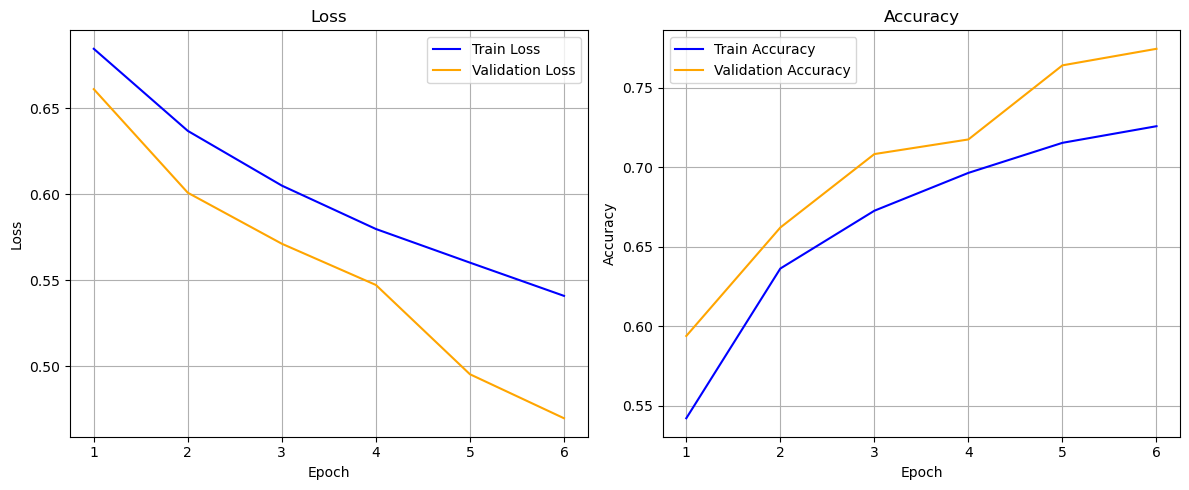

Đã hoàn thành quá trình huấn luyện mô hình


In [20]:
print(f"\n--Vẽ đồ thị loss và accuracy--")
try:
    plt.figure(figsize=(12,5))
    epoch_range=range(1,num_epochs+1)

    #đồ thị loss
    plt.subplot(1,2,1)
    plt.plot(epoch_range,train_losses,label='Train Loss',color='blue')
    plt.plot(epoch_range,validation_losses,label='Validation Loss',color='orange')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    #đồ thị accuracy
    plt.subplot(1,2,2)
    plt.plot(epoch_range,train_accuracies,label='Train Accuracy',color='blue')
    plt.plot(epoch_range,validation_accuracies,label='Validation Accuracy',color='orange')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Đã xảy ra lỗi khi vẽ đồ thị: {e}")
    print(f"Lỗi: Một trong các biến không tồn tại hoặc không được định nghĩa")
    raise
print(f"Đã hoàn thành quá trình huấn luyện mô hình")